In [4]:
import pandas as pd
import numpy as np
# Fixer le nombre total de lignes
num_rows = 1000
# Générer des dates aléatoires sur une année (2023)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="h") # Observations horaires
random_dates = np.random.choice(dates, num_rows, replace=True) # Sélection aléatoire parmi ces dates
# Générer des données météorologiques aléatoires
np.random.seed(42) # Pour des résultats reproductibles
# Températures en °C (variation avec bruit)
temperature = np.round(10 + 15 * np.sin(2 * np.pi * pd.to_datetime(random_dates).dayofyear / 365) + 
np.random.normal(0, 3, num_rows), 1)
# Précipitations en mm (valeurs discrètes, majorité des jours secs)
precipitation = np.random.choice([0, 0, 5, 10, 15, 20], size=num_rows, p=[0.6, 0.2, 0.1, 0.05, 0.03, 0.02])
# Humidité en % (variation saisonnière avec bruit)
humidity = np.round(np.clip(50 + 20 * np.sin(2 * np.pi * pd.to_datetime(random_dates).dayofyear / 365) + 
np.random.normal(0, 10, num_rows), 30, 100), 1)
# Coordonnées géographiques fictives
latitude = np.random.uniform(-90, 90, num_rows)
longitude = np.random.uniform(-180, 180, num_rows)
# Création du DataFrame
weather_data = pd.DataFrame({
"Date": random_dates,
"Temperature": temperature,
"Precipitation": precipitation,
"Humidity": humidity,
"Latitude": latitude,
"Longitude": longitude
})
# Ajouter des colonnes dérivées
weather_data["Temperature_F"] = weather_data["Temperature"] * 9/5 + 32 # Conversion en Fahrenheit
weather_data["Is_Hot"] = (weather_data["Temperature"] > 25).astype(int) # Indicateur binaire pour journées chaudes
# Trier les données par date
weather_data = weather_data.sort_values(by="Date").reset_index(drop=True)
# Enregistrer dans un fichier CSV
weather_data.to_csv("weather_data_1000.csv", index=False)
print("Dataset météo avec 1000 lignes généré et sauvegardé dans 'weather_data_1000.csv'.")

Dataset météo avec 1000 lignes généré et sauvegardé dans 'weather_data_1000.csv'.


In [5]:
import pandas as pd
data = pd.read_csv('weather_data_1000.csv')
data

,Date,Temperature,Precipitation,Humidity,Latitude,Longitude,Temperature_F,Is_Hot
0,2023-01-01 12:00:00,14.8,0,33.1,30.828749,-71.000954,58.64,0
1,2023-01-01 21:00:00,8.4,0,52.3,82.762384,-19.613587,47.12,0
2,2023-01-02 04:00:00,14.6,0,56.7,-19.278880,-106.536820,58.28,0
3,2023-01-03 00:00:00,7.5,0,60.7,-23.008814,-34.082870,45.50,0
4,2023-01-03 10:00:00,14.1,0,53.7,-20.029257,174.475612,57.38,0
...,...,...,...,...,...,...,...,...
995,2023-12-29 13:00:00,11.3,0,47.0,2.930994,28.738647,52.34,0
996,2023-12-30 00:00:00,6.4,0,33.6,36.110069,-80.795961,43.52,0
997,2023-12-30 07:00:00,8.6,0,66.4,18.567022,-149.254909,47.48,0
998,2023-12-30 07:00:00,9.1,0,43.9,78.174741,138.126228,48.38,0


In [22]:
print("Dimensions:\n", data.shape)
print("\n Data types:\n", data.dtypes)

Dimensions:
 (1000, 8)

 Data types:
 Date              object
Temperature      float64
Precipitation      int64
Humidity         float64
Latitude         float64
Longitude        float64
Temperature_F    float64
Is_Hot             int64
dtype: object


In [23]:
print(data.describe())

       Temperature  Precipitation     Humidity     Latitude    Longitude  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.551300       1.840000    51.702600    -2.700336    -0.852300   
std      10.817936       4.368465    15.523131    51.069420   103.561562   
min     -13.400000       0.000000    30.000000   -89.994471  -179.918266   
25%       0.600000       0.000000    38.050000   -47.278395   -89.179462   
50%      10.950000       0.000000    51.350000    -3.121833    -6.150004   
75%      20.325000       0.000000    64.425000    40.446042    90.473408   
max      30.900000      20.000000    98.800000    89.920387   179.565457   

       Temperature_F       Is_Hot  
count    1000.000000  1000.000000  
mean       50.992340     0.085000  
std        19.472285     0.279021  
min         7.880000     0.000000  
25%        33.080000     0.000000  
50%        51.710000     0.000000  
75%        68.585000     0.000000  
max        87.620000     1.

In [24]:
min_temp = data['Temperature'].min()
max_temp = data['Temperature'].max()
print(f"Min temperature: {min_temp}°C")
print(f"Max temperature: {max_temp}°C")

Min temperature: -13.4°C
Max temperature: 30.9°C


In [27]:
print(data.isnull().sum())

Date             0
Temperature      0
Precipitation    0
Humidity         0
Latitude         0
Longitude        0
Temperature_F    0
Is_Hot           0
dtype: int64


In [29]:
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())
data['Temperature']

0      14.8
1       8.4
2      14.6
3       7.5
4      14.1
       ... 
995    11.3
996     6.4
997     8.6
998     9.1
999    12.1
Name: Temperature, Length: 1000, dtype: float64

In [31]:
data['Temperature_Fahrenheit'] = data['Temperature'] * 9/5 + 32
data['Temperature_Fahrenheit']

0      58.64
1      47.12
2      58.28
3      45.50
4      57.38
       ...  
995    52.34
996    43.52
997    47.48
998    48.38
999    53.78
Name: Temperature_Fahrenheit, Length: 1000, dtype: float64

In [32]:
chaud = data[data['Temperature'] > 30]
print(chaud)

                    Date  Temperature  Precipitation  Humidity   Latitude  \
247  2023-03-25 08:00:00         30.5              5      72.5  49.543929   
277  2023-04-05 06:00:00         30.9             15      61.0 -29.807788   
321  2023-04-24 10:00:00         30.3              0      78.1 -26.852560   

      Longitude  Temperature_F  Is_Hot  Temperature_Fahrenheit  
247  -56.127018          86.90       1                   86.90  
277 -137.022836          87.62       1                   87.62  
321  -77.693654          86.54       1                   86.54  


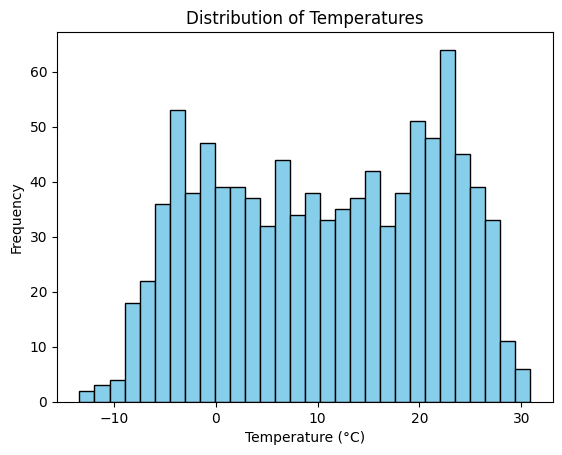

In [33]:
import matplotlib.pyplot as plt
plt.hist(data['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

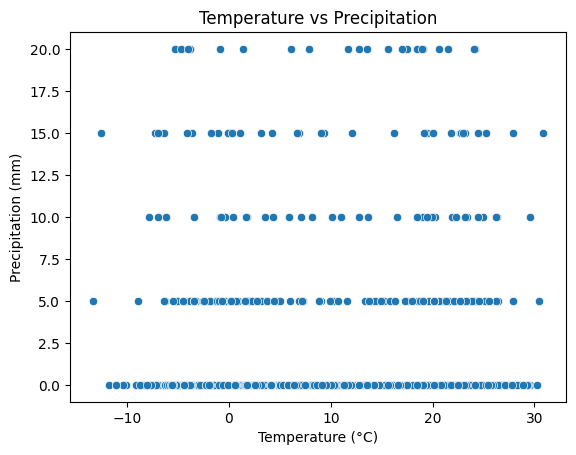

In [37]:
import seaborn as sns
sns.scatterplot(x='Temperature', y='Precipitation', data=data)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()


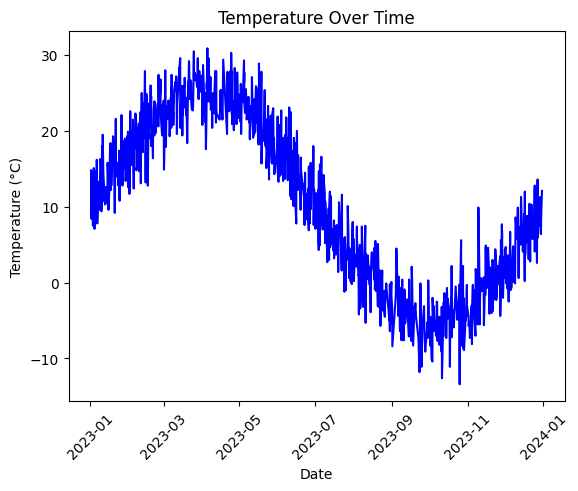

In [43]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Temperature'], color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


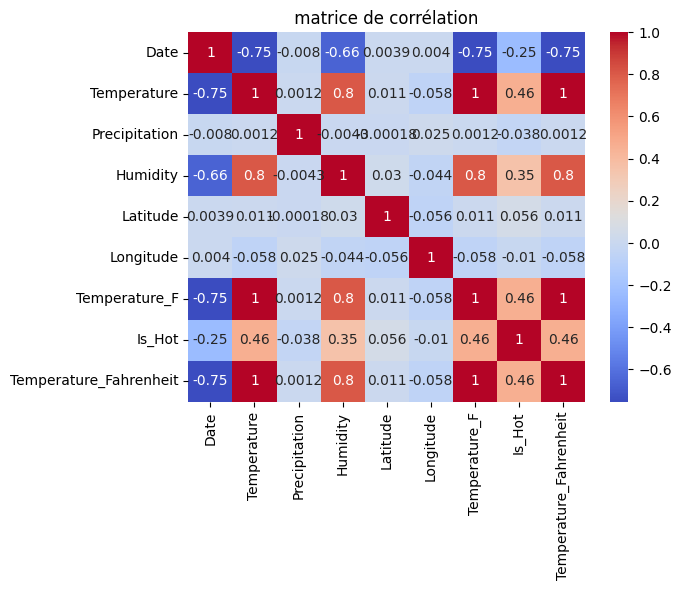

In [44]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(' matrice de corrélation ')
plt.show()


In [41]:
data.to_csv("weather_data_transformed.csv", index=False)

In [42]:
data

,Date,Temperature,Precipitation,Humidity,Latitude,Longitude,Temperature_F,Is_Hot,Temperature_Fahrenheit
0,2023-01-01 12:00:00,14.8,0,33.1,30.828749,-71.000954,58.64,0,58.64
1,2023-01-01 21:00:00,8.4,0,52.3,82.762384,-19.613587,47.12,0,47.12
2,2023-01-02 04:00:00,14.6,0,56.7,-19.278880,-106.536820,58.28,0,58.28
3,2023-01-03 00:00:00,7.5,0,60.7,-23.008814,-34.082870,45.50,0,45.50
4,2023-01-03 10:00:00,14.1,0,53.7,-20.029257,174.475612,57.38,0,57.38
...,...,...,...,...,...,...,...,...,...
995,2023-12-29 13:00:00,11.3,0,47.0,2.930994,28.738647,52.34,0,52.34
996,2023-12-30 00:00:00,6.4,0,33.6,36.110069,-80.795961,43.52,0,43.52
997,2023-12-30 07:00:00,8.6,0,66.4,18.567022,-149.254909,47.48,0,47.48
998,2023-12-30 07:00:00,9.1,0,43.9,78.174741,138.126228,48.38,0,48.38
